In [1]:
import logging
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [5]:
def Calculating_PCA(data_object):
	sc.tl.pca(data_object)

In [3]:
VA = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VA/Ecto_12_VA.h5ad")
VAE_VA = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VAE_VA/Ecto_12_VAE_VA.h5ad")
#VAE_flows = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/With_testdata/VAE_flows/Meso_Endo_5p3_VAE_flows.h5ad")
mVAE_flows = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_ecto_forward_12hpf.h5ad")

In [4]:
objects = [VA,VAE_VA,mVAE_flows]

In [6]:
Visual_obj = objects[0][objects[0].obs["cells"] != "Predicted data"]
obj = ["VA","VAE+VA","mVAE+flows"]
for i in range(3):
	temp_obj = objects[i][objects[i].obs["cells"] == "Predicted data"]
	temp_obj.obs["cells"] = obj[i]
	Visual_obj = Visual_obj.concatenate(temp_obj)

    

/tmp/ipykernel_22654/2600053626.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  temp_obj.obs["cells"] = obj[i]
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/tmp/ipykernel_22654/2600053626.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  temp_obj.obs["cells"] = obj[i]
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass 

In [10]:
Calculating_PCA(Visual_obj)


In [11]:
pca_pal = ["grey","darkgrey","#d62728","#ff7f0e","#1f77b4","#2ca02c"]


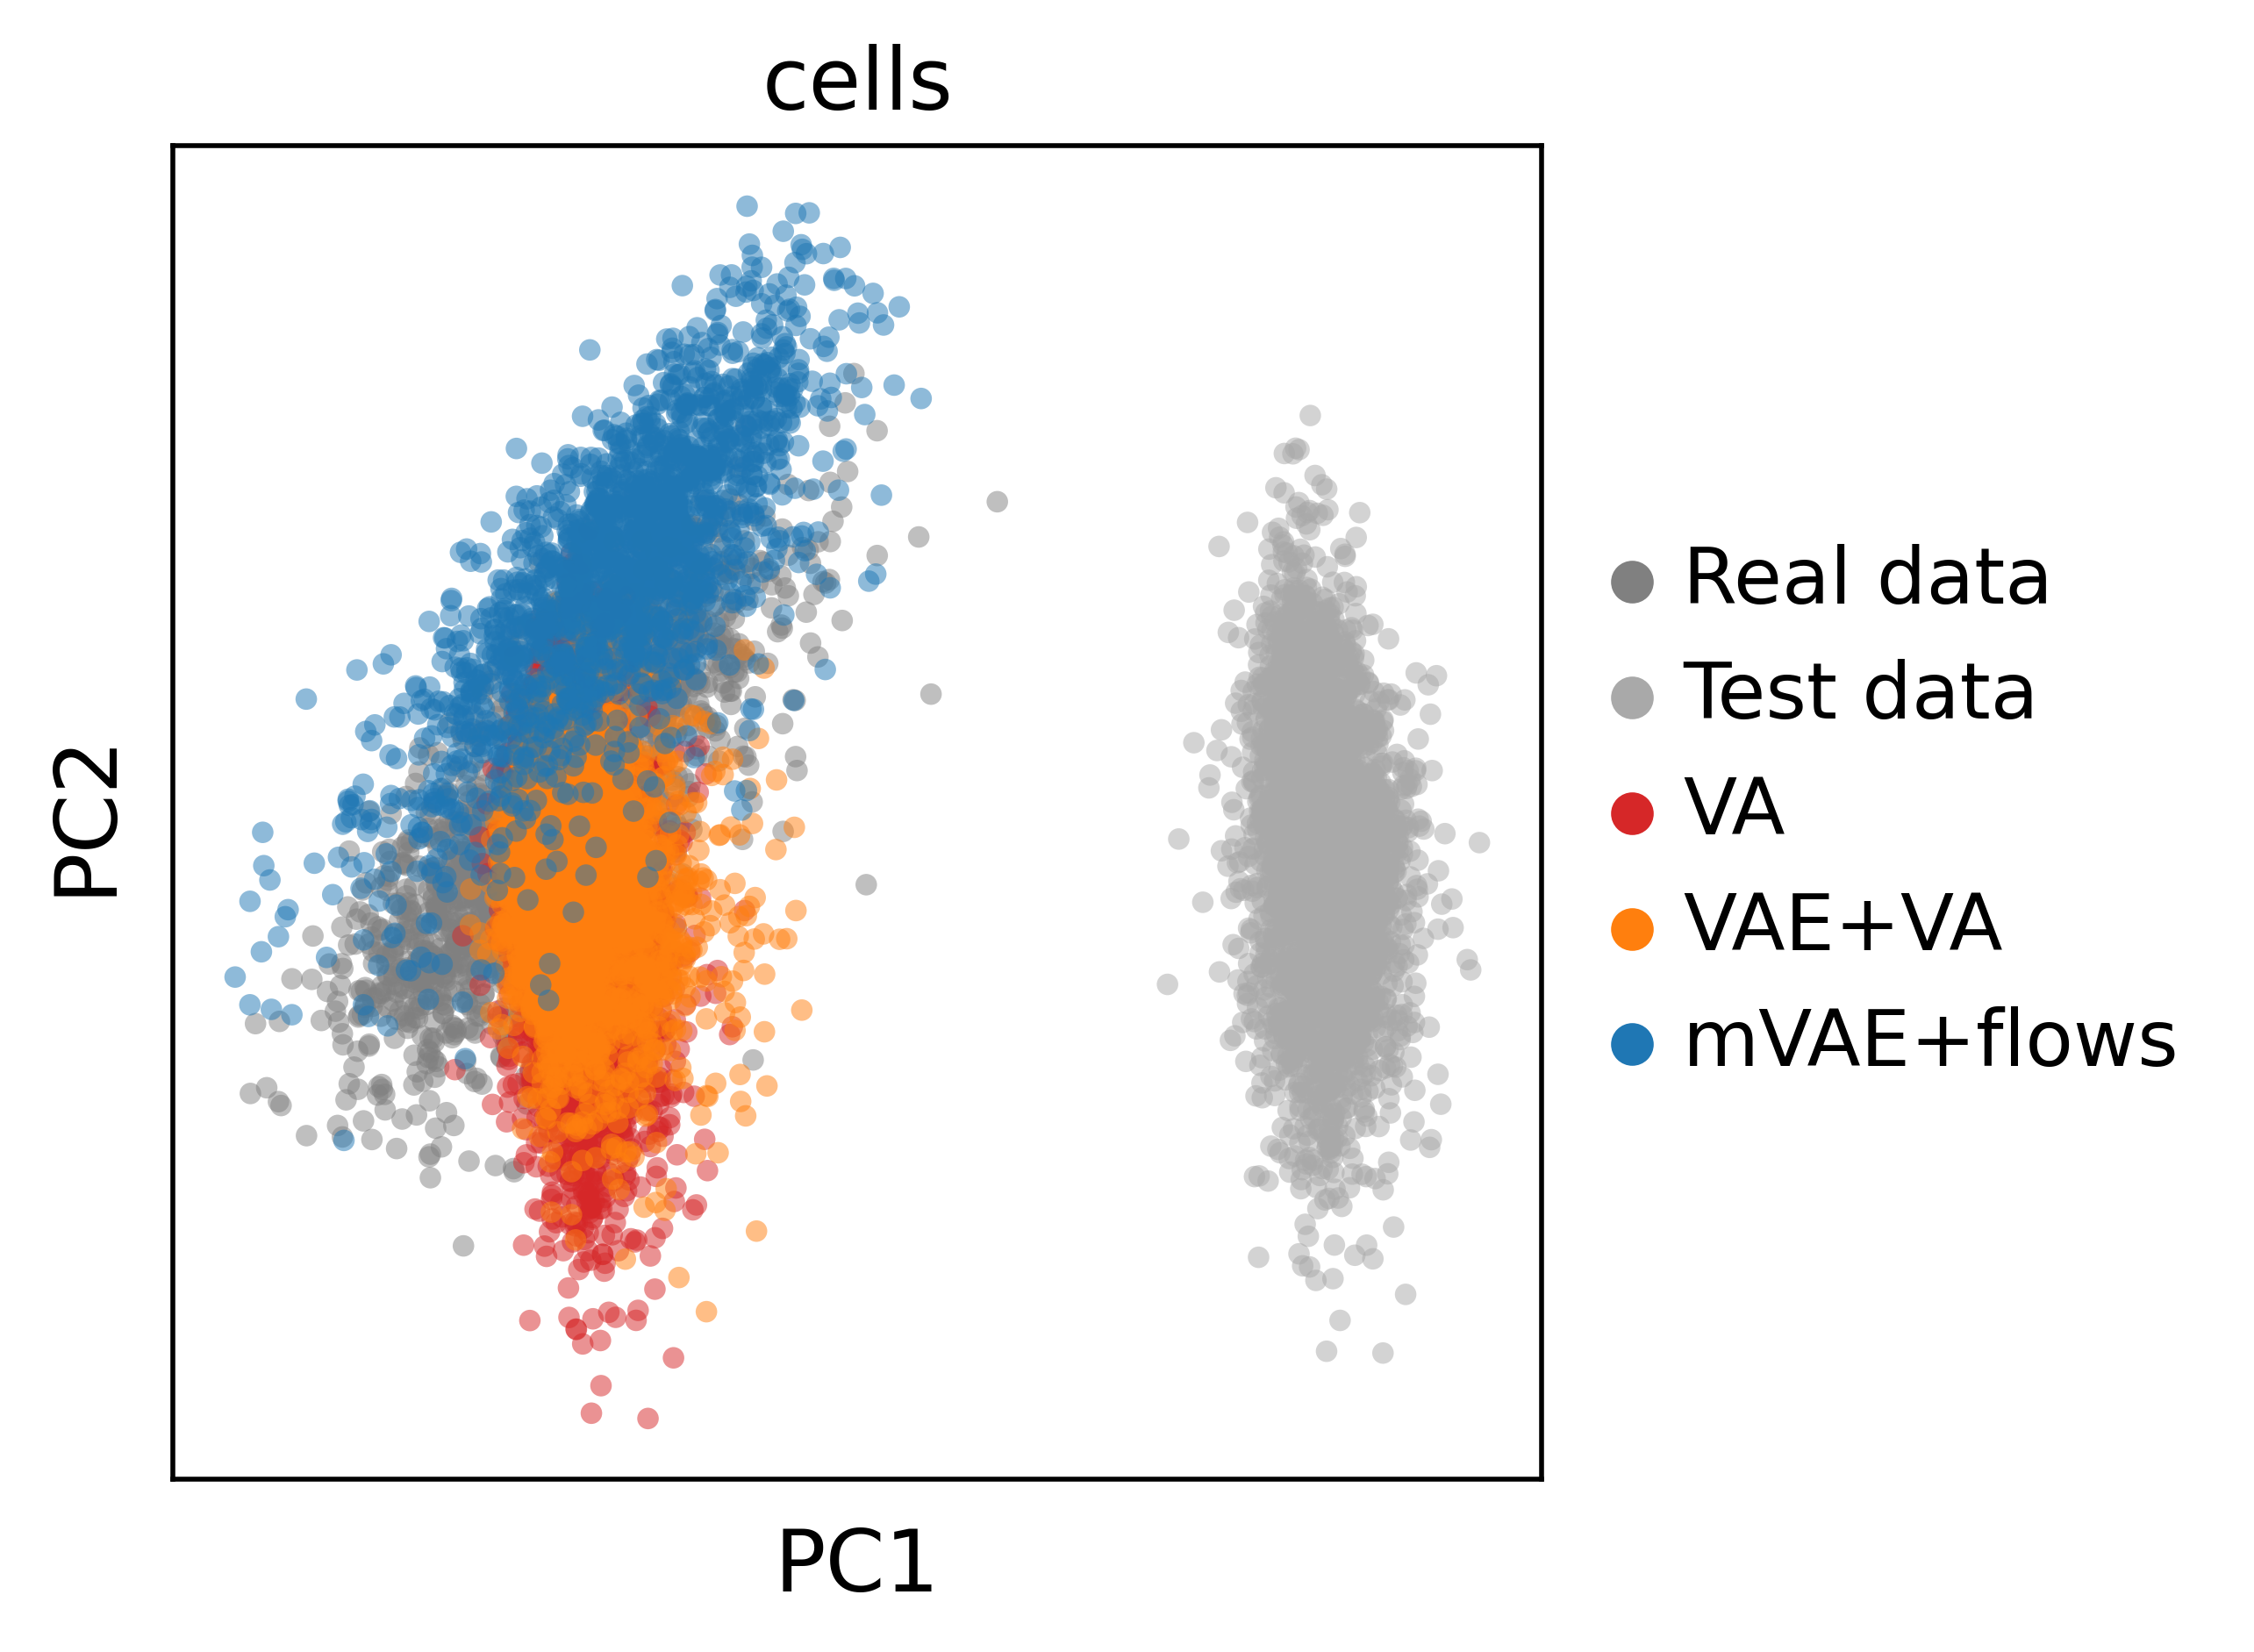

In [12]:
sc.pl.pca(Visual_obj, color="cells",size=50,alpha = 0.5,palette=pca_pal,components=['1,2'])

In [15]:
mVAE_flows = Visual_obj[(Visual_obj.obs["cells"] != "VAE+VA") & (Visual_obj.obs["cells"] != "VA")]
VA = Visual_obj[(Visual_obj.obs["cells"] != "VAE+VA") & (Visual_obj.obs["cells"] != "mVAE+flows")]
VAE_VA = Visual_obj[(Visual_obj.obs["cells"] != "mVAE+flows") & (Visual_obj.obs["cells"] != "VA")]


In [22]:
pca_pal = ["grey","darkgrey","#d62728","#ff7f0e","#1f77b4","#2ca02c"]
pca_pal_ = ["grey","darkgrey","#1f77b4"]

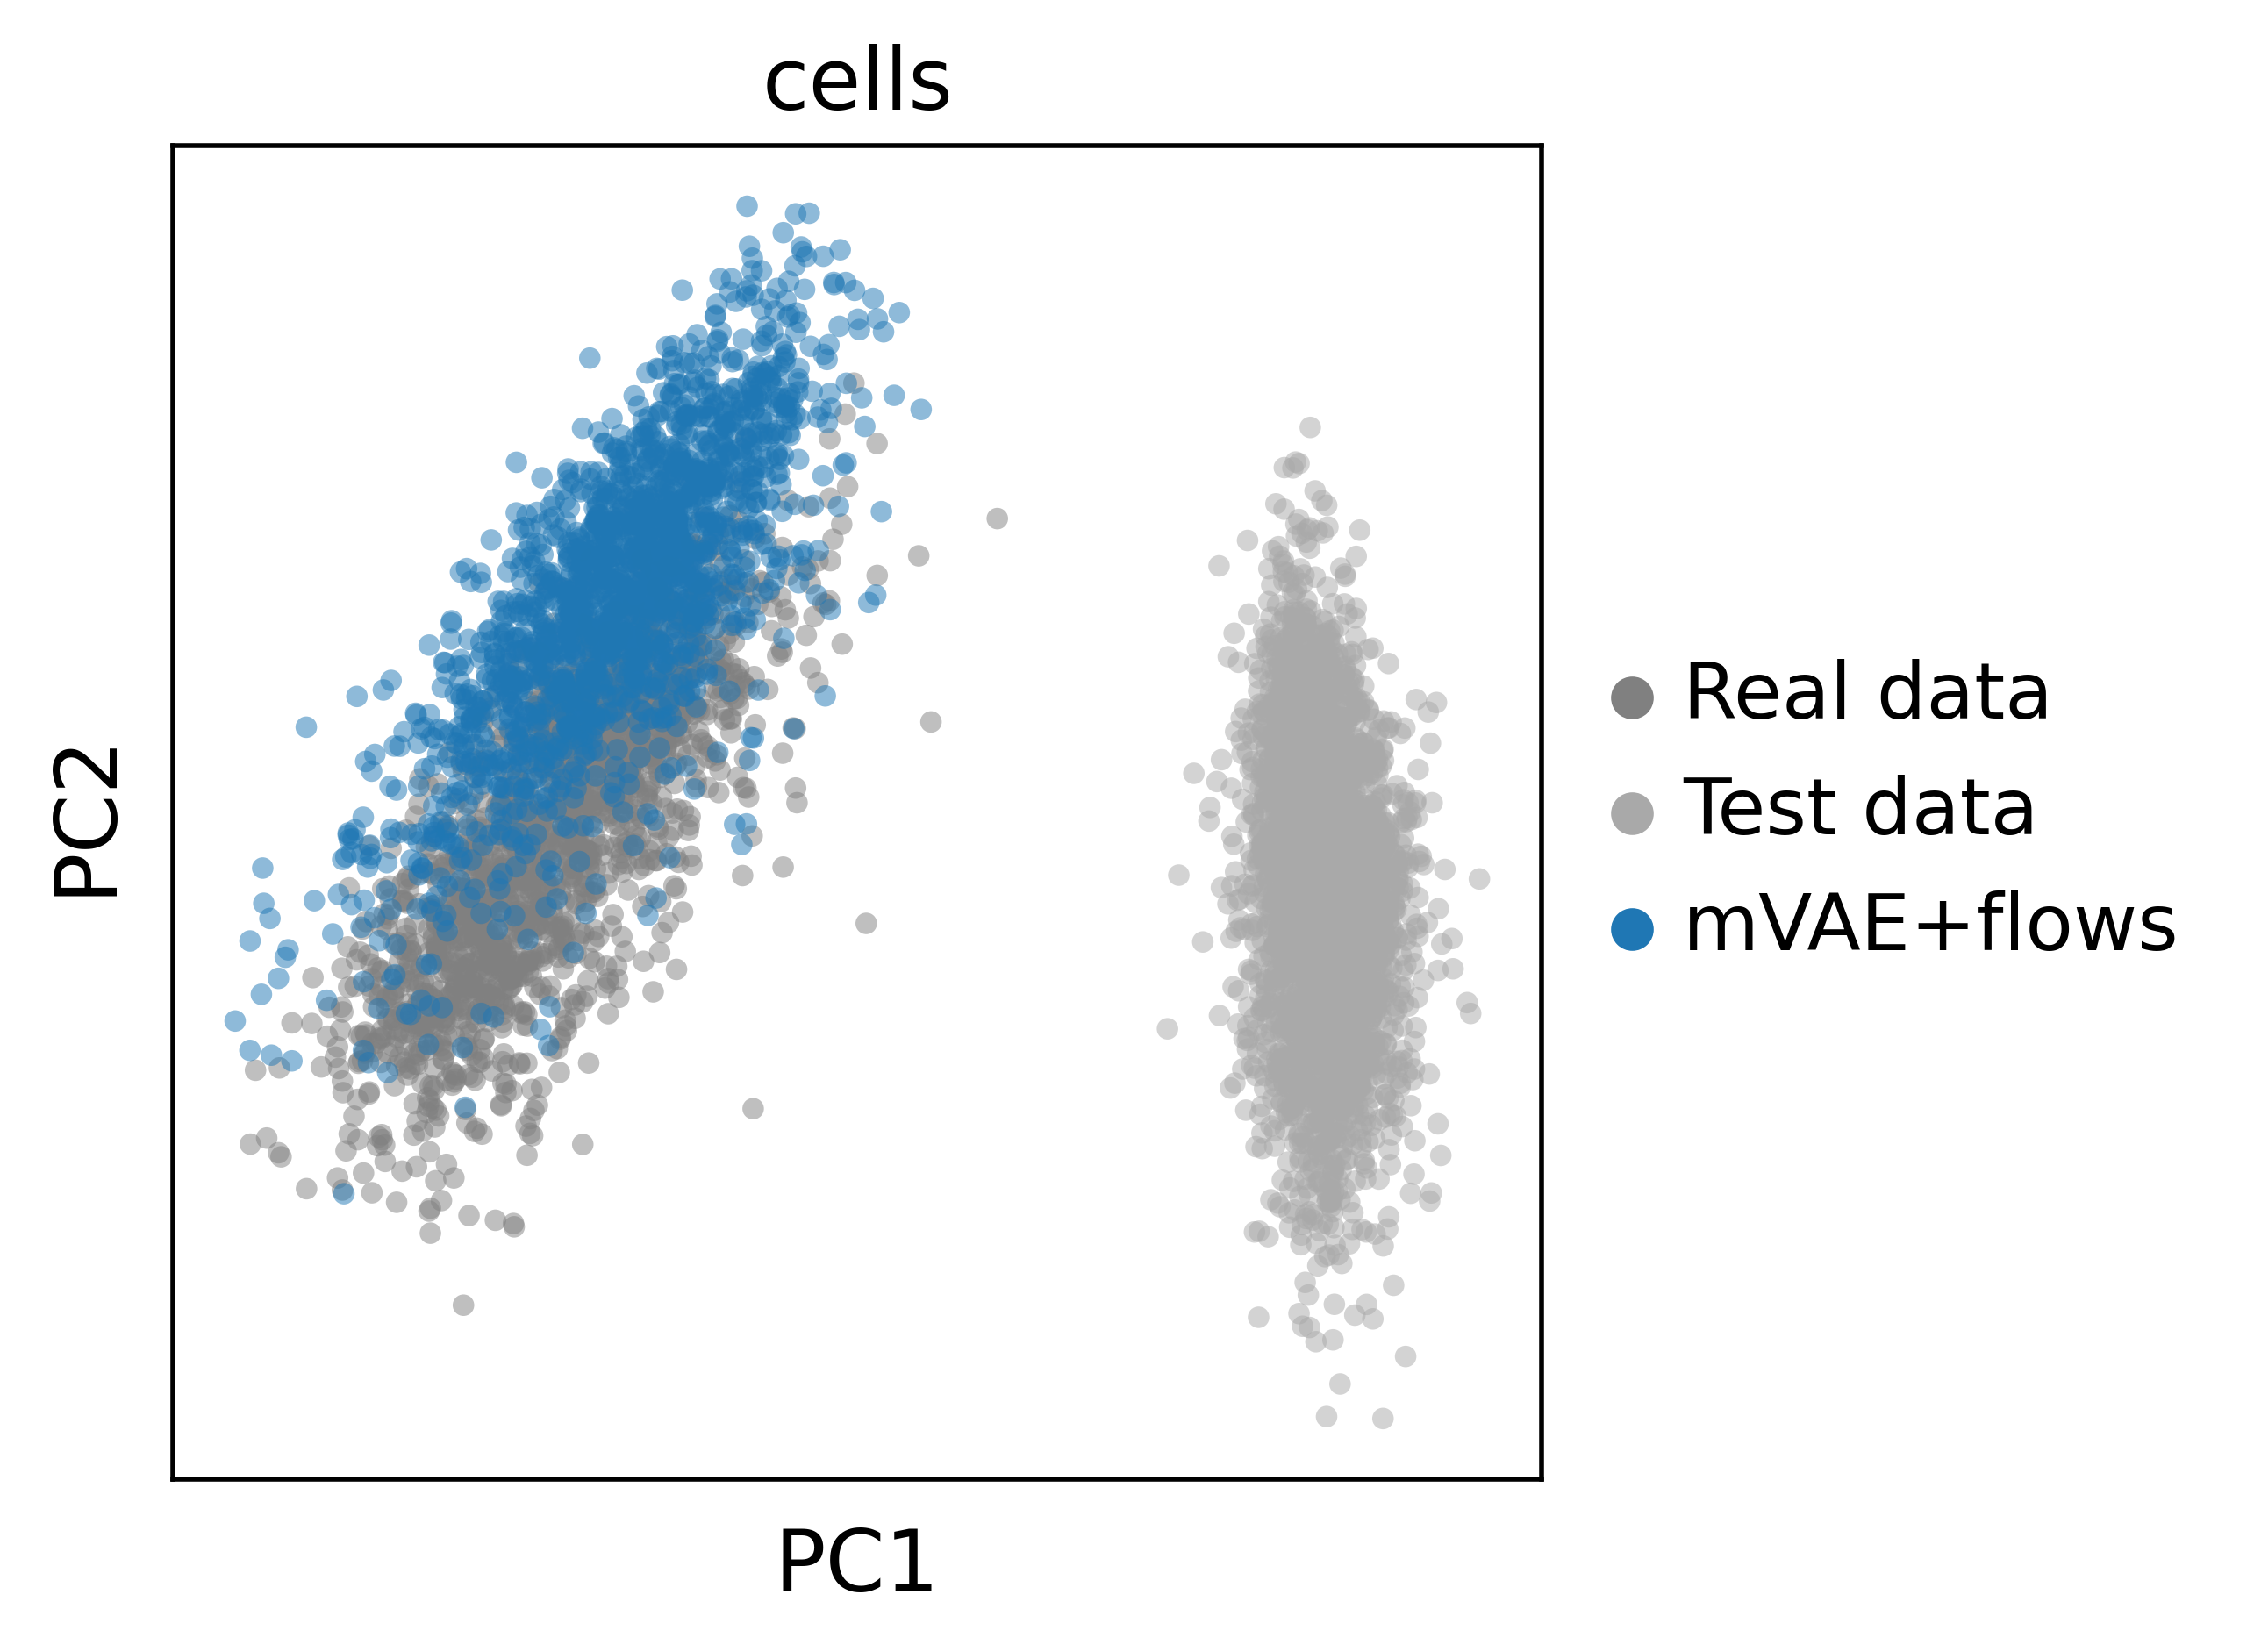

In [23]:
sc.pl.pca(mVAE_flows, color="cells",size=50,alpha = 0.5,palette=pca_pal_,components=['1,2'])

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

def corrfunc(x, y, **kws):
	slope, intercept, r, p_value, _err = stats.linregress(x, y)
	ax = plt.gca()
	ax.annotate("$R^2$ = {:.2f}".format(r**2),
				xy=(.1, .9), xycoords=ax.transAxes)

def Plotting_Correlation_genes(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0, 100,20)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xlim(0,80) 
    plt.ylim(0,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()
    
def Plotting_Correlation_var(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0, 40,5)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    sns.despine(offset=2)
    plt.xlim(-1,25) 
    plt.ylim(-1,20)
    plt.grid(False)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)
    plt.show()

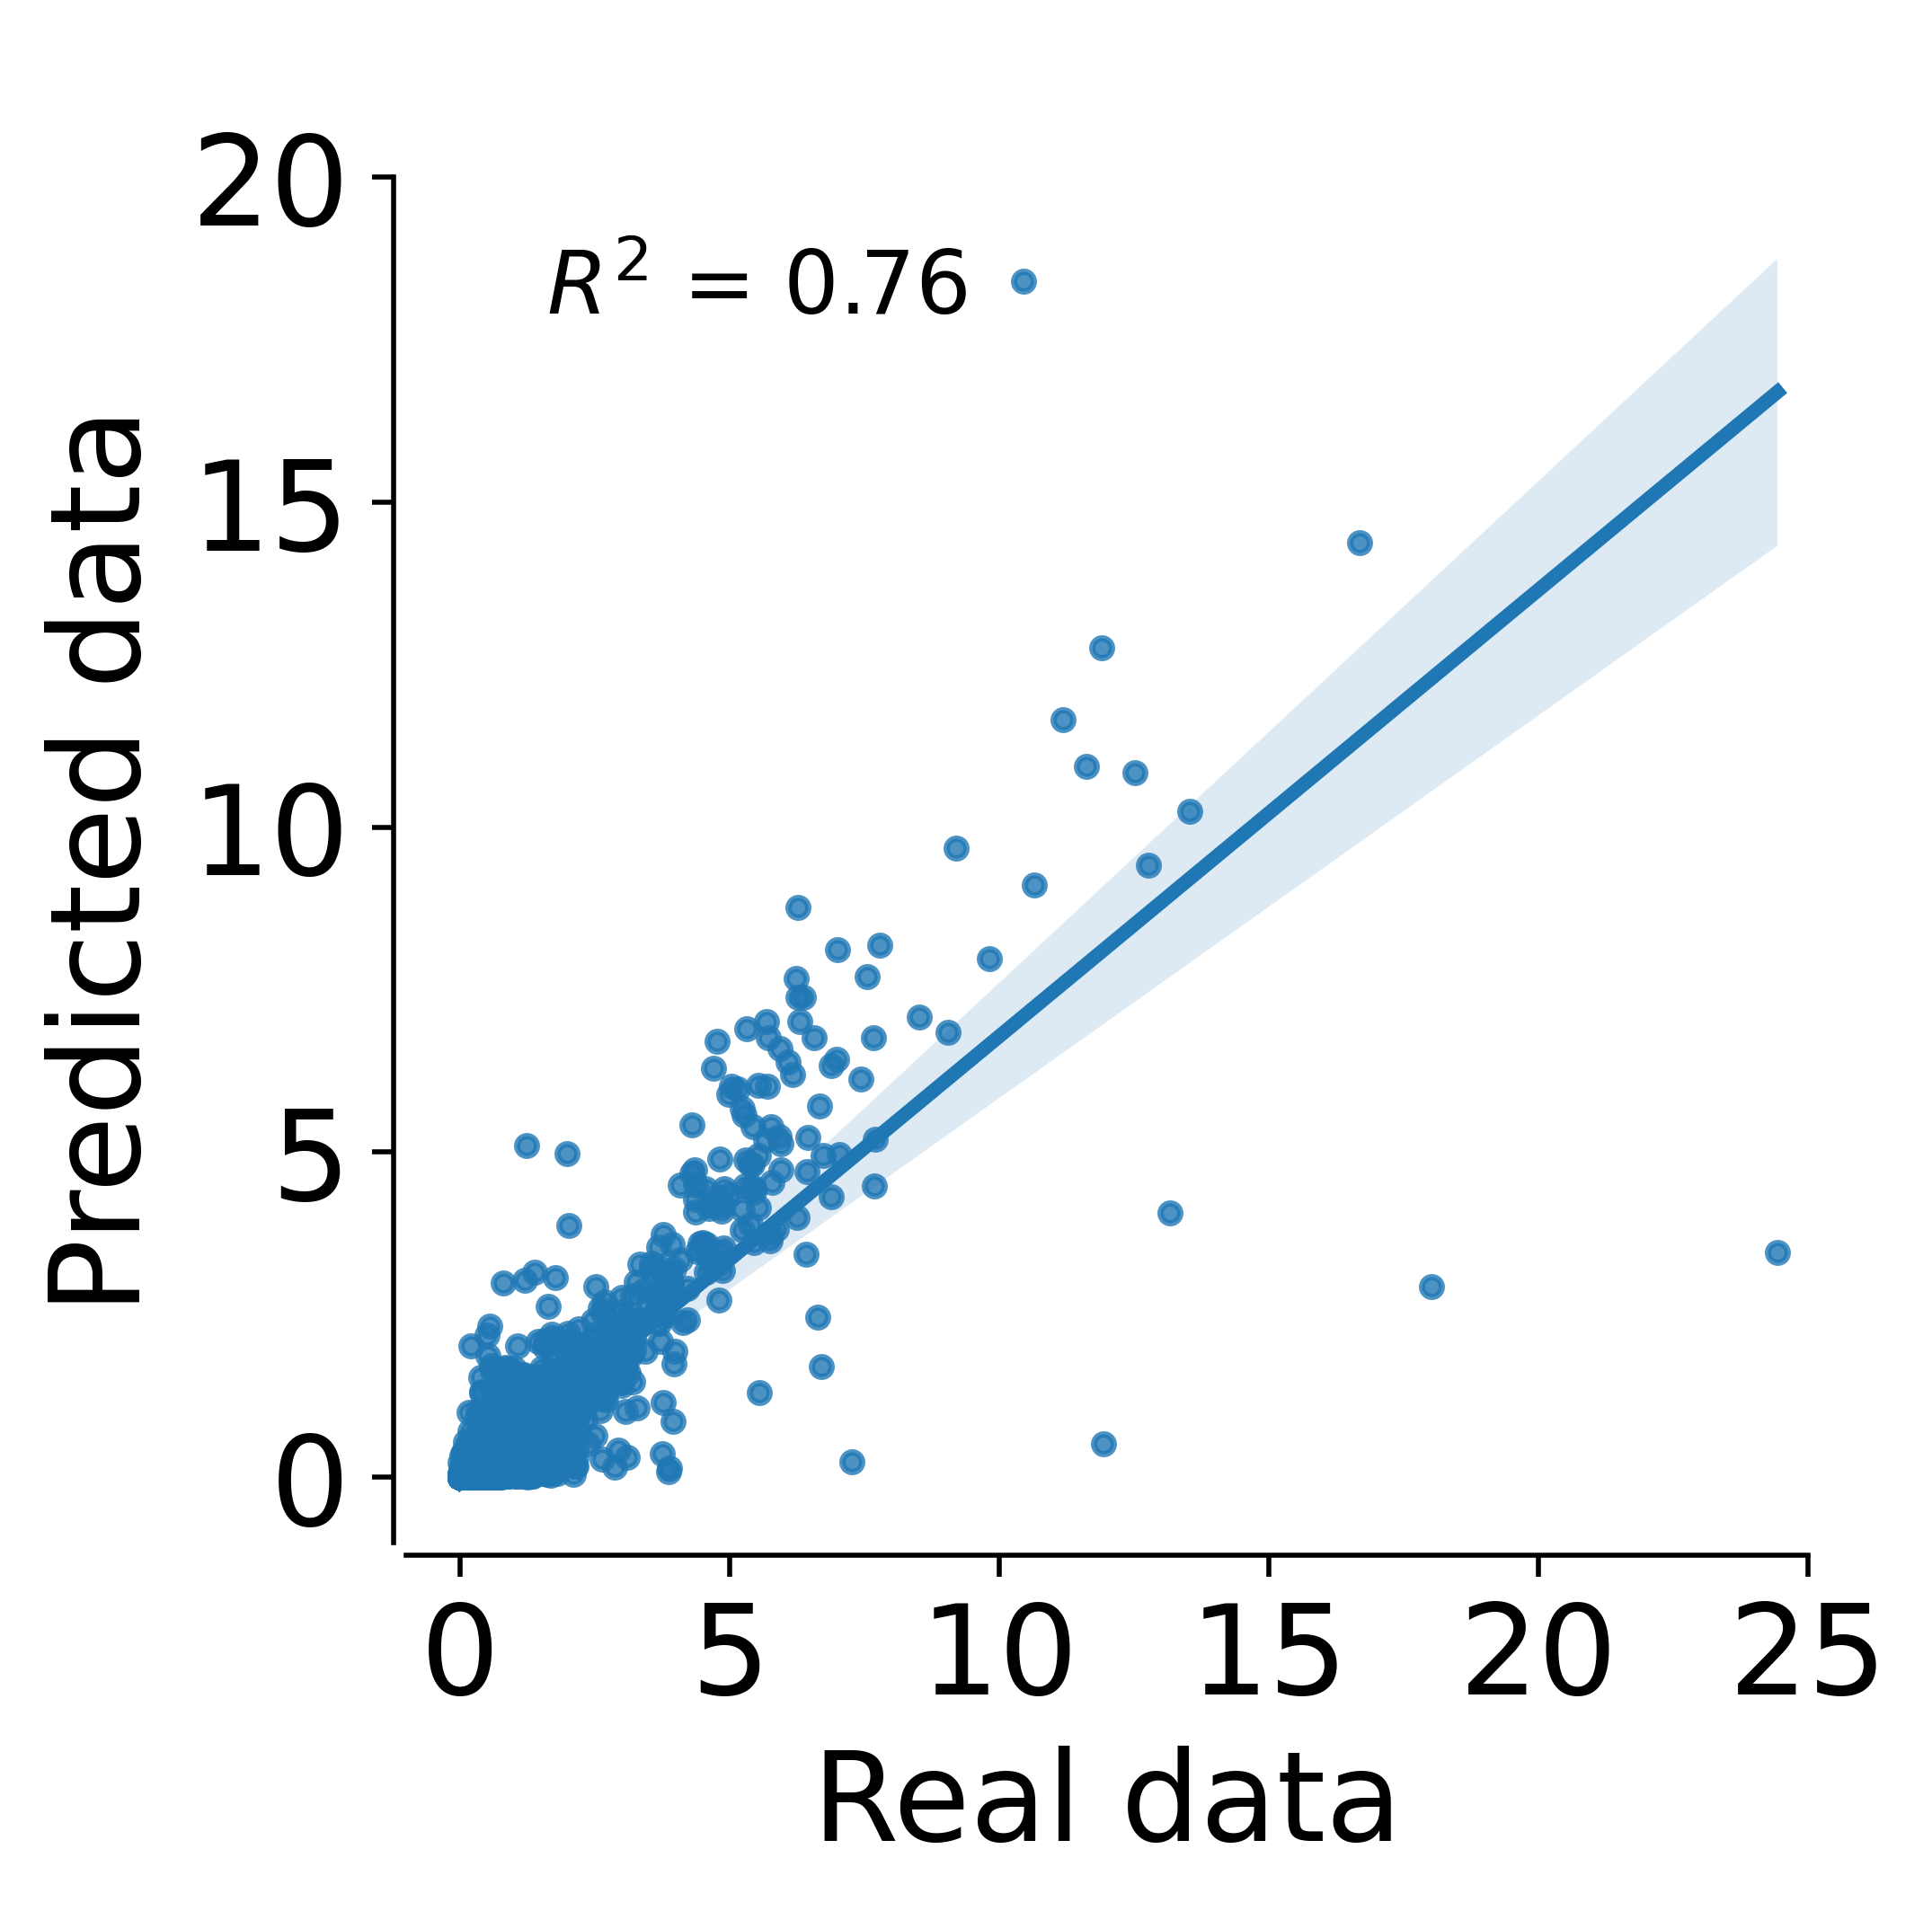

In [39]:
Plotting_Correlation_var(objects[2]," ",pca_pal[4])